In [2]:
import csv
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

In [3]:
# parsing the amenities variable
df['amenities'] = df['amenities'].str.replace('{', '')
df['amenities'] = df['amenities'].str.replace('}', '')
df['amenities'] = df['amenities'].str.replace('"', '')

# make a tuple to store all the amenities
amenities_all = np.unique(np.concatenate(df['amenities'].map(lambda x: x.split(","))))

# match each record's amenities
for amenity in amenities_all:
    df[amenity] = df['amenities'].map(lambda x: True if x.find(amenity) > 0 else False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Columns: 160 entries, id to translation missing: en.hosting_amenity_50
dtypes: bool(132), float64(7), int64(3), object(18)
memory usage: 25.2+ MB


In [5]:
# exclude variables that are meaningless or are out of this project's scope
df = df.drop(['id', 'thumbnail_url', 'amenities', 'latitude', 'longitude', 'name', 'description', 'neighbourhood'], axis=1)

In [6]:
# exclude variables that do not exist at the initial listing
df = df.drop(['first_review', 'last_review', 'number_of_reviews', 'review_scores_rating', 'host_response_rate', 'host_since'], axis=1)

In [7]:
# clean zipcode
df['zipcode'] = df['zipcode'].astype(str)
df['zipcode']=df['zipcode'].map(lambda x: x.strip('.0'))
df['zipcode']=df['zipcode'].map(lambda x: x.strip('lm'))
df['zipcode']=df['zipcode'].map(lambda x: x.strip('Near'))
df['zipcode']=df['zipcode'].map(lambda x: x.replace("\n", ""))
df['zipcode']=df['zipcode'].map(lambda x: x.replace("\r", ""))
df['zipcode']=df['zipcode'].map(lambda x: x.replace("-", ""))
df['zipcode']=df['zipcode'].map(lambda x: x.replace(" ", ""))

df['zipcode']=df['zipcode'].map(lambda x: x[:5])
df['zipcode']=df['zipcode'].map(lambda x: x.zfill(5))
df['zipcode']=df['zipcode'].map(lambda x: x.replace("00nan", "NA"))

In [8]:
# transform categorical variables to dummies
df['property_type'] = df['property_type'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df['bed_type'] = df['bed_type'].astype('category')
df['cancellation_policy'] = df['cancellation_policy'].astype('category')

for i in ['cancellation_policy', 'property_type', 'room_type', 'bed_type', 'zipcode', 'city']:
    df = pd.concat([df, pd.get_dummies(df[i])], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Columns: 852 entries, log_price to SF
dtypes: bool(132), category(4), float64(4), int64(1), object(5), uint8(706)
memory usage: 65.2+ MB


In [8]:
df.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,94401,95202,99135,NA,Boston,Chicago,DC,LA,NYC,SF
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,...,0,0,0,0,0,0,0,0,1,0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,...,0,0,0,0,0,0,0,0,1,0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,...,0,0,0,0,0,0,0,0,1,0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,...,0,0,0,0,0,0,0,0,0,1
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,...,0,0,0,0,0,0,1,0,0,0


In [9]:
df1 = df.dropna()

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73579 entries, 0 to 74110
Columns: 852 entries, log_price to SF
dtypes: bool(132), category(4), float64(4), int64(1), object(5), uint8(706)
memory usage: 65.3+ MB


In [10]:
df1 = df.drop(['cancellation_policy', 'property_type', 'room_type', 'bed_type', 'zipcode', 'city'], axis=1)

In [11]:
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73579 entries, 0 to 74110
Columns: 846 entries, log_price to SF
dtypes: bool(132), float64(4), int64(1), object(3), uint8(706)
memory usage: 63.9+ MB


In [54]:
df1.head()

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,bedrooms,beds,,...,94401,95202,99135,NA,Boston,Chicago,DC,LA,NYC,SF
0,5.010635,3,1.0,True,t,t,f,1.0,1.0,False,...,0,0,0,0,0,0,0,0,1,0
1,5.129899,7,1.0,True,t,f,t,3.0,3.0,False,...,0,0,0,0,0,0,0,0,1,0
2,4.976734,5,1.0,True,t,t,t,1.0,3.0,False,...,0,0,0,0,0,0,0,0,1,0
3,6.620073,4,1.0,True,t,t,f,2.0,2.0,False,...,0,0,0,0,0,0,0,0,0,1
4,4.744932,2,1.0,True,t,t,t,0.0,1.0,False,...,0,0,0,0,0,0,1,0,0,0


In [12]:
df1['host_has_profile_pic']=df1['host_has_profile_pic'].astype('bool')
df1['host_identity_verified']=df1['host_identity_verified'].astype('bool')
df1['instant_bookable']=df1['instant_bookable'].astype('bool')

In [103]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

X = df1.iloc[:,1:852]
y = df1.log_price


# Fit regression model
#regr_1 = DecisionTreeRegressor(max_depth=2)
#regr_2 = DecisionTreeRegressor(max_depth=5)
#regr_1.fit(X, y)
#regr_2.fit(X, y)
regressor = DecisionTreeRegressor(random_state=0,min_samples_leaf=1000,
                                      max_depth=10,max_leaf_nodes=35)
scores=cross_val_score(regressor, X, y, cv=10,scoring='neg_mean_squared_error')
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
# Predict
#X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
#y_1 = regr_1.predict(X_test)
#y_2 = regr_2.predict(X_test)

Accuracy: -0.2328 (+/- 0.0140)


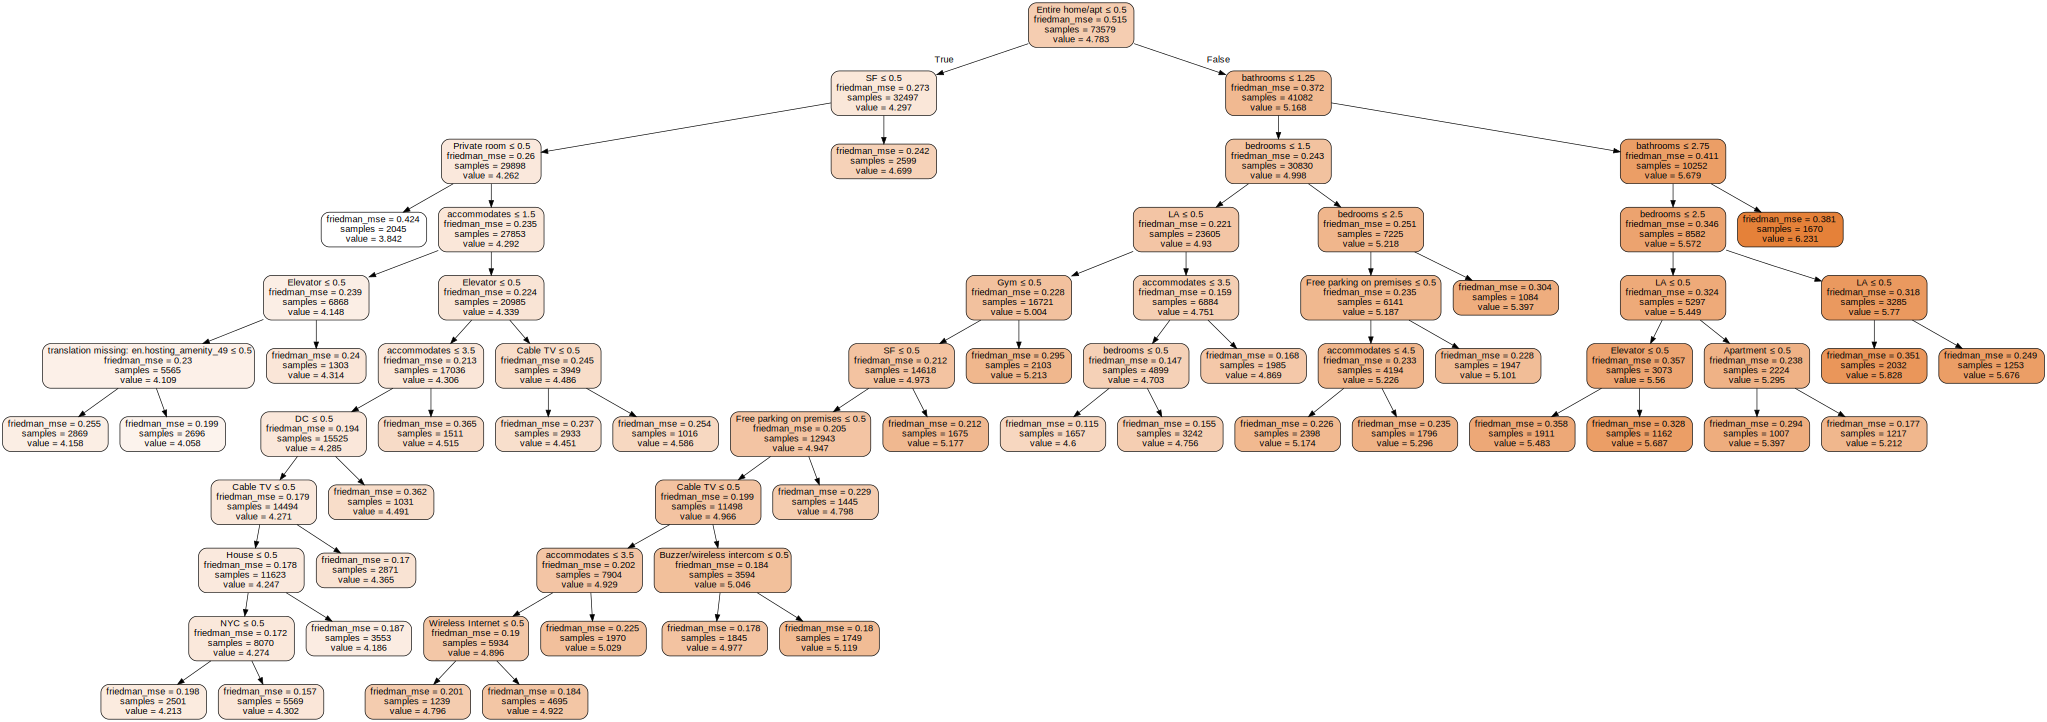

In [99]:
import graphviz 
from sklearn import tree

regressor1=regressor.fit(X,y)
dot_data = tree.export_graphviz(regressor1, out_file=None,feature_names=X.columns,
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph

In [100]:
regressor1.feature_importances_ 

array([1.63620416e-02, 1.99774714e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.51662086e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.71615591e-04,
       3.78810429e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.51133742e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [124]:
from sklearn.model_selection import GridSearchCV

regressor2 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),scoring='neg_mean_squared_error',
                  param_grid=[{'max_depth': list(range(3,16,1)), 
                              'min_samples_leaf':[1000,2000,3000],
                              'max_leaf_nodes':list(range(20,41,2))}],
                  cv=10,
                  n_jobs=4)

regressor2 = regressor2.fit(X,y)
print(regressor2.best_score_)
print(regressor2.best_params_)

-0.23245426120645782
{'max_depth': 10, 'max_leaf_nodes': 40, 'min_samples_leaf': 1000}


In [1]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

%matplotlib inline
# Import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris #Import Iris Data Set
from sklearn import linear_model # The sklearn.linear_model module implements generalized linear models
import numpy as np # NumPy is the package for scientific computing with Python


# Load the Iris data set
# See 'ISOM 672_Decision Trees' for a description of this data set
iris = load_iris()
X = iris.data[:, [2, 3]] # Specify attributes/predictors
y = iris.target          # Specify target variable

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1) # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)   # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") #Show legend of the plot at the best location possible
    return plt # function that returns the plot as an output

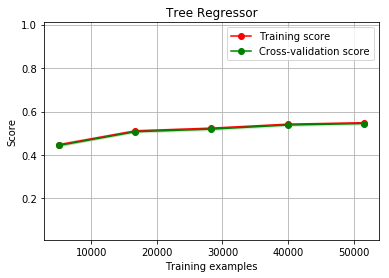

In [13]:
# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# kNN classifier class
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

X = df1.iloc[:,1:852]
y = df1.log_price

title = "Tree Regressor"

# Class ShuffleSplit is a random permutation cross-validator
# Parameter n_splits = Number of re-shuffling & splitting iterations
# Parameter test_size = represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
# Parameter random_state = the seed used by the random number generator
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = DecisionTreeRegressor(random_state=0,min_samples_leaf=1000,
                                      max_depth=10,max_leaf_nodes=40) # Build multiple LRs as we increase the size of the traning data
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0.01, 1.01), cv=cv, n_jobs=4)

plt.show() # Display the figure